In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = 'oco2_LtCO2_180501_B11014Ar_221109180232s.nc4'

In [18]:
temp = xr.open_dataset(file, group='Sounding')
land_water = temp['land_water_indicator'].data
glint_angle = temp['glint_angle'].data
temp.close()

temp = xr.open_dataset(file)
qf = temp['xco2_quality_flag'].data
vza = temp['sensor_zenith_angle'].data
sza = temp['solar_zenith_angle'].data
temp.close()
#sza = xr.open_dataset(file)['solar_zenith_angle'].data
#

In [4]:

lt = xr.open_dataset(file, group='Retrieval')
o2a_alb = lt['albedo_o2a'].data
wco2_alb = lt['albedo_wco2'].data
sco2_alb = lt['albedo_sco2'].data
lt.close()

In [5]:
land_water

array([1., 1., 1., ..., 3., 0., 3.], dtype=float32)

In [6]:
(qf == np.nan).sum()

0

In [7]:
ocean = np.where(land_water==1)
land = np.where(land_water==0)

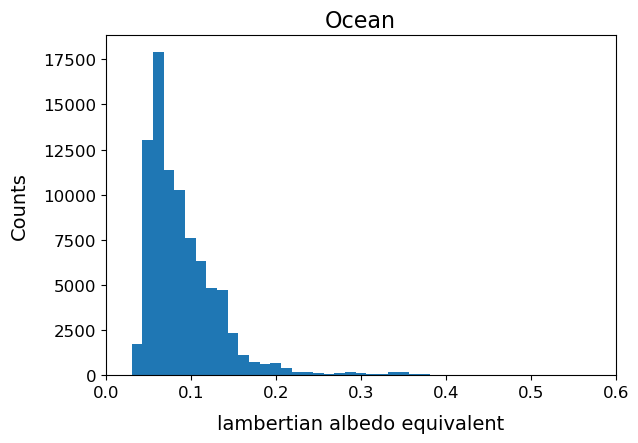

In [37]:
import matplotlib.dates as mdates
plt.rcParams["date.autoformatter.minute"] = "%H:%M"

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_axes([0.05, 0.05, 0.85, 0.85])


#ax1.scatter(data.time, data.NO2_dSCD)
ax1.hist(o2a_alb[ocean], bins=101, )
label_fontsize=14
tick_size=12
ax1.set_xlabel('lambertian albedo equivalent', color='k', fontsize=label_fontsize, labelpad=10)
ax1.set_ylabel('Counts', color='k', fontsize=label_fontsize, labelpad=10)
ax1.xaxis.set_tick_params(labelsize=tick_size)
ax1.yaxis.set_tick_params(labelsize=tick_size)

ax1.set_title('Ocean', fontsize=label_fontsize+2)
(x0, x1), (y0, y1) = ax1.get_xlim(), ax1.get_ylim()
ax1.set_xlim(0, 00.6)

# fig.savefig('Q4.3-1.png', dpi=150, bbox_inches='tight')
plt.show()



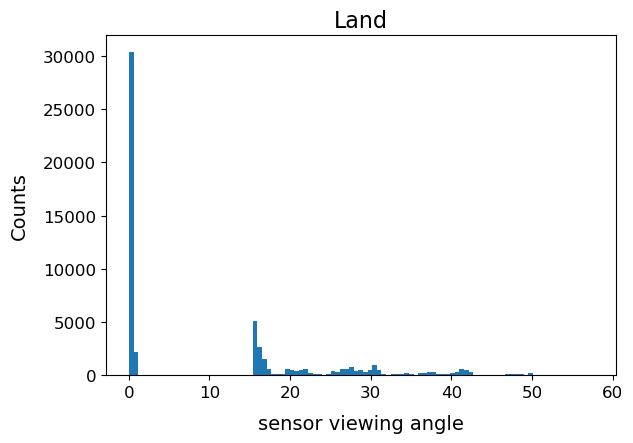

In [16]:
import matplotlib.dates as mdates
plt.rcParams["date.autoformatter.minute"] = "%H:%M"

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_axes([0.05, 0.05, 0.85, 0.85])


#ax1.scatter(data.time, data.NO2_dSCD)
ax1.hist(vza[land], bins=101, label='ocean')
#ax1.hist(glint_angle[land], bins=101, label='land')
label_fontsize=14
tick_size=12
ax1.set_xlabel('sensor viewing angle', color='k', fontsize=label_fontsize, labelpad=10)
ax1.set_ylabel('Counts', color='k', fontsize=label_fontsize, labelpad=10)
ax1.xaxis.set_tick_params(labelsize=tick_size)
ax1.yaxis.set_tick_params(labelsize=tick_size)

ax1.set_title('Land', fontsize=label_fontsize+2)
(x0, x1), (y0, y1) = ax1.get_xlim(), ax1.get_ylim()
#ax1.set_xlim(0, 30)

# fig.savefig('Q4.3-1.png', dpi=150, bbox_inches='tight')
plt.show()





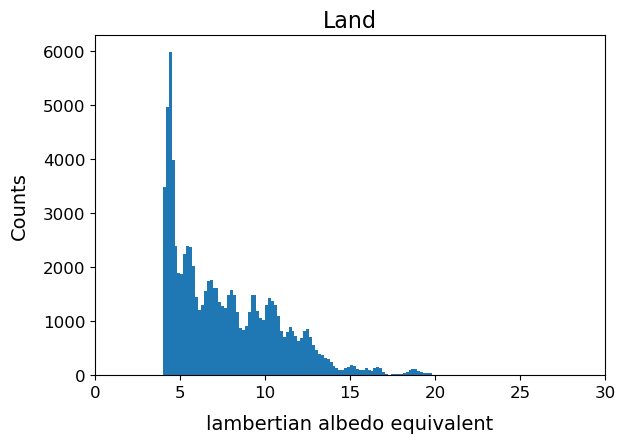

In [13]:
import matplotlib.dates as mdates
plt.rcParams["date.autoformatter.minute"] = "%H:%M"

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_axes([0.05, 0.05, 0.85, 0.85])


#ax1.scatter(data.time, data.NO2_dSCD)
ax1.hist(glint_angle[ocean], bins=101, label='ocean')
#ax1.hist(glint_angle[land], bins=101, label='land')
label_fontsize=14
tick_size=12
ax1.set_xlabel('Glint angle', color='k', fontsize=label_fontsize, labelpad=10)
ax1.set_ylabel('Counts', color='k', fontsize=label_fontsize, labelpad=10)
ax1.xaxis.set_tick_params(labelsize=tick_size)
ax1.yaxis.set_tick_params(labelsize=tick_size)

ax1.set_title('Land', fontsize=label_fontsize+2)
(x0, x1), (y0, y1) = ax1.get_xlim(), ax1.get_ylim()
ax1.set_xlim(0, 30)

# fig.savefig('Q4.3-1.png', dpi=150, bbox_inches='tight')
plt.show()




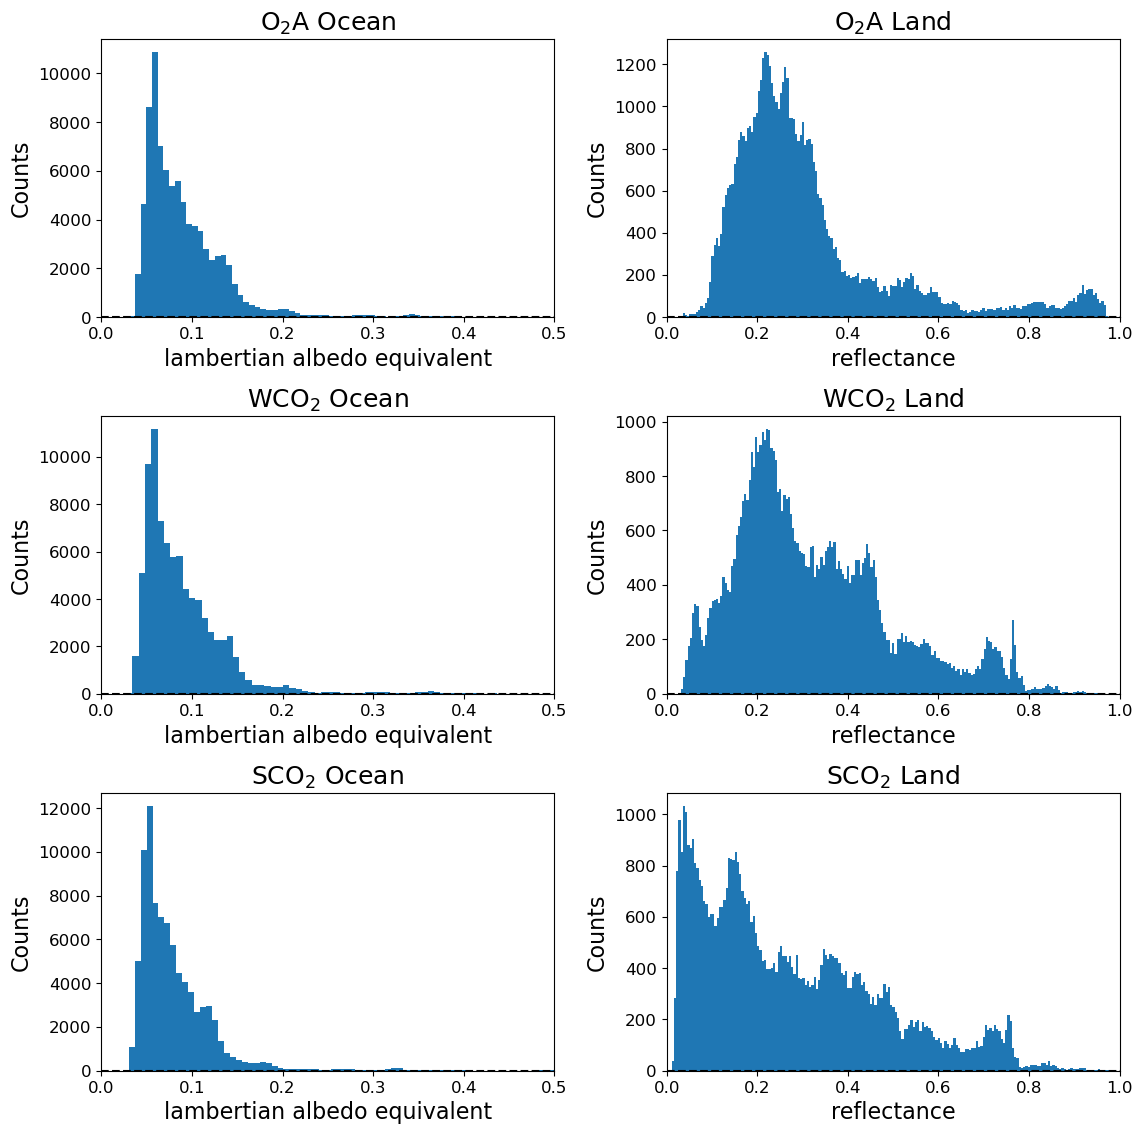

In [20]:
fig, ((ax11, ax12), 
      (ax21, ax22),
      (ax31, ax32)) = plt.subplots(3, 2, figsize=(12, 12), sharex=False)
fig.tight_layout(pad=5.0)
label_size = 16
tick_size = 12


bins_size = 201

ax11.hist(o2a_alb[ocean], bins=bins_size,)
ax12.hist(o2a_alb[land], bins=bins_size,)
ax21.hist(wco2_alb[ocean], bins=bins_size,)
ax22.hist(wco2_alb[land], bins=bins_size,)
ax31.hist(sco2_alb[ocean], bins=bins_size,)
ax32.hist(sco2_alb[land], bins=bins_size,)


for ax in [ax11, ax21, ax31, ax12, ax22, ax32]:
    ax.set_ylabel('Counts', fontsize=label_size)
    ax.tick_params(axis='both', labelsize=tick_size)
    _, xmax = ax.get_xlim()
    ax.hlines(0, 0, xmax, linestyle='--', color='k')

ax11.set_xlabel('lambertian albedo equivalent', fontsize=label_size)
ax12.set_xlabel('reflectance', fontsize=label_size)
ax21.set_xlabel('lambertian albedo equivalent', fontsize=label_size)
ax22.set_xlabel('reflectance', fontsize=label_size)
ax31.set_xlabel('lambertian albedo equivalent', fontsize=label_size)
ax32.set_xlabel('reflectance', fontsize=label_size)


ax11.set_title('$\mathrm{O_2A}$ Ocean', fontsize=label_size+2)
ax12.set_title('$\mathrm{O_2A}$ Land', fontsize=label_size+2)
ax21.set_title('$\mathrm{WCO_2}$ Ocean', fontsize=label_size+2)
ax22.set_title('$\mathrm{WCO_2}$ Land', fontsize=label_size+2)
ax31.set_title('$\mathrm{SCO_2}$ Ocean', fontsize=label_size+2)
ax32.set_title('$\mathrm{SCO_2}$ Land', fontsize=label_size+2)

for ax in [ax11, ax21, ax31]:
    ax.set_xlim(0, 0.5)
    
    
for ax in [ax12, ax22, ax32]:
    ax.set_xlim(0, 1)
#ax.plot([20, 20], [0, 1.1], 'r')
#ax.plot([400, 400], [0, 1.1], 'r')
#ax.set_ylim(0, 1.1)
#ax.fill_between(t[2:41]*1e9, intensity[2:41], 0, color='lightgrey', interpolate=True)
#I0 = quad(intensity_fxn, 20e-9, 400e-9, args=(decay_const))[0]

#ax.set_yscale('log')
fig.savefig('ocean_land_reflectance.png', dpi=150, bbox_inches='tight')
plt.show()

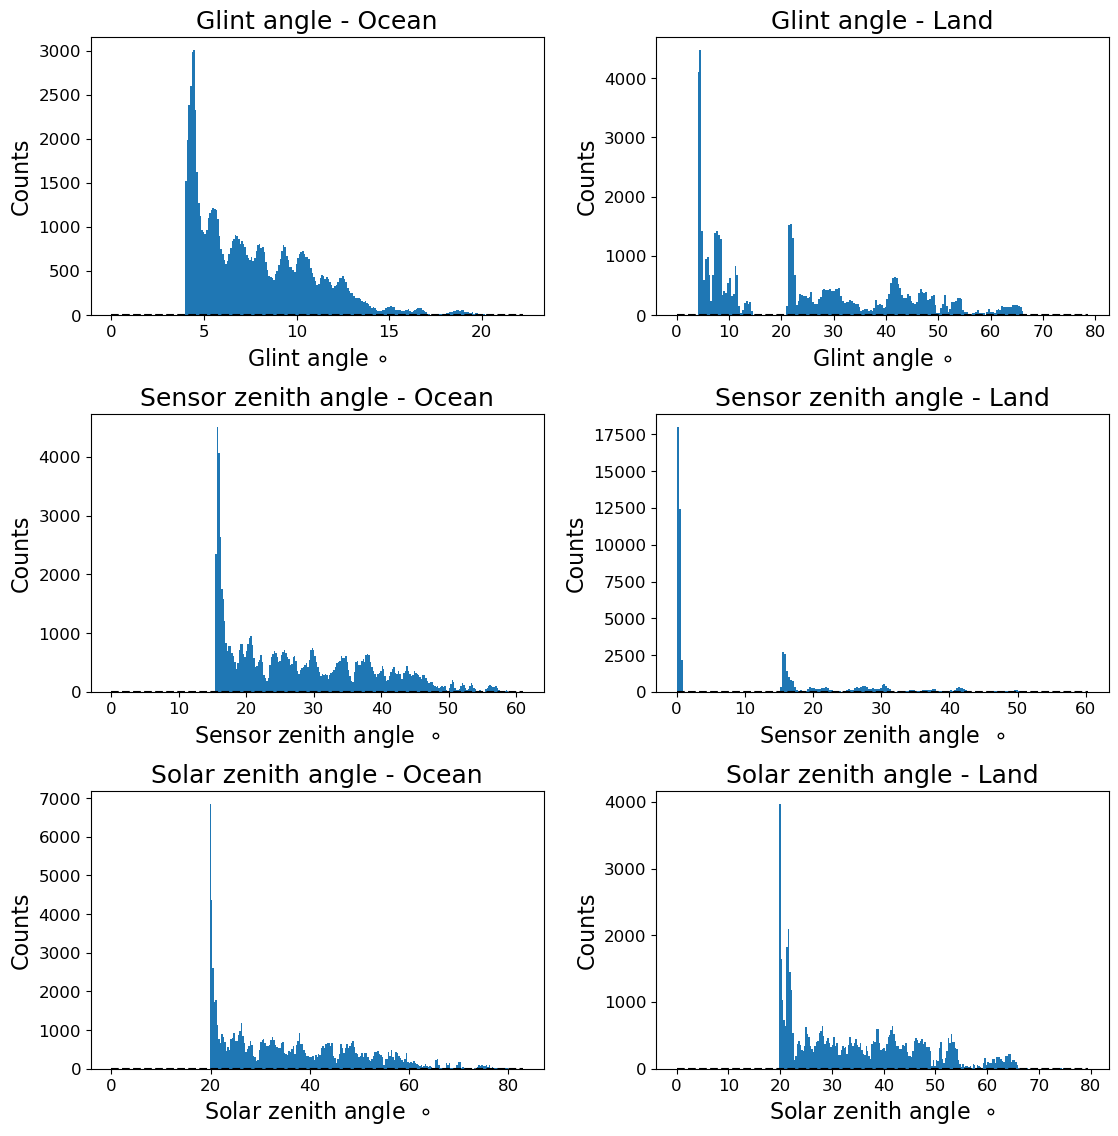

In [21]:
fig, ((ax11, ax12), 
      (ax21, ax22),
      (ax31, ax32)) = plt.subplots(3, 2, figsize=(12, 12), sharex=False)
fig.tight_layout(pad=5.0)
label_size = 16
tick_size = 12


bins_size = 201

ax11.hist(glint_angle[ocean], bins=bins_size,)
ax12.hist(glint_angle[land], bins=bins_size,)
ax21.hist(vza[ocean], bins=bins_size,)
ax22.hist(vza[land], bins=bins_size,)
ax31.hist(sza[ocean], bins=bins_size,)
ax32.hist(sza[land], bins=bins_size,)


for ax in [ax11, ax21, ax31, ax12, ax22, ax32]:
    ax.set_ylabel('Counts', fontsize=label_size)
    ax.tick_params(axis='both', labelsize=tick_size)
    _, xmax = ax.get_xlim()
    ax.hlines(0, 0, xmax, linestyle='--', color='k')

ax11.set_xlabel('Glint angle $\circ$', fontsize=label_size)
ax12.set_xlabel('Glint angle $\circ$', fontsize=label_size)
ax21.set_xlabel('Sensor zenith angle  $\circ$', fontsize=label_size)
ax22.set_xlabel('Sensor zenith angle  $\circ$', fontsize=label_size)
ax31.set_xlabel('Solar zenith angle  $\circ$', fontsize=label_size)
ax32.set_xlabel('Solar zenith angle  $\circ$', fontsize=label_size)


ax11.set_title('Glint angle - Ocean', fontsize=label_size+2)
ax12.set_title('Glint angle - Land', fontsize=label_size+2)
ax21.set_title('Sensor zenith angle - Ocean', fontsize=label_size+2)
ax22.set_title('Sensor zenith angle - Land', fontsize=label_size+2)
ax31.set_title('Solar zenith angle - Ocean', fontsize=label_size+2)
ax32.set_title('Solar zenith angle - Land', fontsize=label_size+2)

#for ax in [ax11, ax21, ax31]:
#    ax.set_xlim(0, 0.5)
    
    
#for ax in [ax12, ax22, ax32]:
#    ax.set_xlim(0, 1)
#ax.plot([20, 20], [0, 1.1], 'r')
#ax.plot([400, 400], [0, 1.1], 'r')
#ax.set_ylim(0, 1.1)
#ax.fill_between(t[2:41]*1e9, intensity[2:41], 0, color='lightgrey', interpolate=True)
#I0 = quad(intensity_fxn, 20e-9, 400e-9, args=(decay_const))[0]

#ax.set_yscale('log')
fig.savefig('ocean_land_sza_vza.png', dpi=150, bbox_inches='tight')
plt.show()